In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os, re, glob
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import folium
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import IFrame
from IPython.display import Image
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
 
%matplotlib inline

In [3]:
root = 'C:/Users/antho/Desktop/covid'
recent_date = "12-31-2020"
previous_date = "09-01-2020"
 
duplicate_columns = {"Lat": "Latitude", 
                     "Long_": "Longitude",
                     "Incidence_Rate": "Incident_Rate",
                     "Case-Fatality_Ratio": "Case_Fatality_Ratio",
                     "Province/State": "Province_State",
                     "Country/Region": "Country_Region",
                     "Last Update": "Last_Update"}
 
recent_df = pd.read_csv(os.path.join(root, (recent_date + ".csv")))
previous_df = pd.read_csv(os.path.join(root, (previous_date + ".csv")))
 
for key, value in duplicate_columns.items(): 
    if key in recent_df.columns:
        recent_df = recent_df.rename(columns={key: value}) 
    if key in previous_df.columns:
        previous_df = previous_df.rename(columns={key: value})

In [4]:
recent_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-01 05:23:07,33.93911,67.709953,52330,2189,41727,8414,Afghanistan,134.426484,4.183069
1,NaN,NaN,NaN,Albania,2021-01-01 05:23:07,41.15330,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-01 05:23:07,28.03390,1.659600,99610,2756,67127,29727,Algeria,227.155372,2.766790
3,NaN,NaN,NaN,Andorra,2021-01-01 05:23:07,42.50630,1.521800,8049,84,7432,533,Andorra,10417.394681,1.043608
4,NaN,NaN,NaN,Angola,2021-01-01 05:23:07,-11.20270,17.873900,17553,405,11044,6104,Angola,53.407342,2.307298


In [5]:
previous_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-09-02 04:28:25,33.93911,67.709953,38282,1410,29231,7641,Afghanistan,98.339665,3.683193
1,NaN,NaN,NaN,Albania,2020-09-02 04:28:25,41.15330,20.168300,9606,290,5441,3875,Albania,333.796650,3.018946
2,NaN,NaN,NaN,Algeria,2020-09-02 04:28:25,28.03390,1.659600,44833,1518,31493,11822,Algeria,102.239301,3.385899
3,NaN,NaN,NaN,Andorra,2020-09-02 04:28:25,42.50630,1.521800,1184,53,908,223,Andorra,1532.388533,4.476351
4,NaN,NaN,NaN,Angola,2020-09-02 04:28:25,-11.20270,17.873900,2729,109,1084,1536,Angola,8.303346,3.994137


In [6]:
current_df = pd.DataFrame(columns=['Province_State','Country_Region','Confirmed','Deaths'])
current_df['Province_State'] = recent_df['Province_State']
current_df['Country_Region'] = recent_df['Country_Region']
current_df['Confirmed'] = recent_df['Confirmed'] - previous_df['Confirmed'] 
current_df['Deaths'] = recent_df['Deaths'] - previous_df['Deaths'] 
current_df['Latitude'] = recent_df['Latitude']
current_df['Longitude'] = recent_df['Longitude']

In [7]:
current_df.shape

(4003, 6)

In [8]:
current_df.head()

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude
0,NaN,Afghanistan,14048.0,779.0,33.93911,67.709953
1,NaN,Albania,48710.0,891.0,41.15330,20.168300
2,NaN,Algeria,54777.0,1238.0,28.03390,1.659600
3,NaN,Andorra,6865.0,31.0,42.50630,1.521800
4,NaN,Angola,14824.0,296.0,-11.20270,17.873900


In [9]:
name_number = 'AnthonetteAdanyin-2120726.csv'
current_df.to_csv(name_number, index=False)

In [10]:
data = pd.read_csv(name_number)

In [11]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude
0,NaN,Afghanistan,14048.0,779.0,33.93911,67.709953
1,NaN,Albania,48710.0,891.0,41.15330,20.168300
2,NaN,Algeria,54777.0,1238.0,28.03390,1.659600
3,NaN,Andorra,6865.0,31.0,42.50630,1.521800
4,NaN,Angola,14824.0,296.0,-11.20270,17.873900


In [12]:
print(data.shape)

(4003, 6)


In [13]:
print(data.count())

Province_State    3828
Country_Region    4003
Confirmed         3982
Deaths            3982
Latitude          3915
Longitude         3915
dtype: int64


# Question 1 Print how many null values exist in the dataset?

isnull().sum()  function print the sum of the null values in the data set

In [14]:
data.isnull().sum()

Province_State    175
Country_Region      0
Confirmed          21
Deaths             21
Latitude           88
Longitude          88
dtype: int64

In [15]:
data.loc[data['Province_State'].isnull(),'Province_State'] = data['Country_Region']

In [16]:
print(data.count())

Province_State    4003
Country_Region    4003
Confirmed         3982
Deaths            3982
Latitude          3915
Longitude         3915
dtype: int64


In [17]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude
0,Afghanistan,Afghanistan,14048.0,779.0,33.93911,67.709953
1,Albania,Albania,48710.0,891.0,41.15330,20.168300
2,Algeria,Algeria,54777.0,1238.0,28.03390,1.659600
3,Andorra,Andorra,6865.0,31.0,42.50630,1.521800
4,Angola,Angola,14824.0,296.0,-11.20270,17.873900


In [18]:
states = data['Province_State'].unique()
print("Number of unique States - ", len(states))

Number of unique States -  764


# Question 2

Print how many unique countries exist in the dataset using a similar approach.

In [19]:
Country = data['Country_Region'].unique()
print("Number of unique Country - ", len(Country))

Number of unique Country -  197


In [20]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [21]:
import datetime, time, requests
from time import sleep
from geopy.geocoders import Nominatim
 
 
def get_lat_lon(place):
    geolocator = Nominatim(user_agent=name_number)
    location = geolocator.geocode(place)
    lat_lon = location.latitude, location.longitude
    
    output = [float(i) for i in lat_lon]
    return output

In [22]:
from tqdm import tqdm
 
geo_lat = []
geo_lon = []
 
not_found = []
found = []
for state in tqdm(states):
    time.sleep(0.2)
    lat_lon = [None, None]
    try:
        lat_lon = get_lat_lon(state)
        found.append(state)
    except:   
        not_found.append(state)
        
    geo_lat.append(lat_lon[0])
    geo_lon.append(lat_lon[1])
 
if len(not_found) > 0:
    print("Locations are not found for - ", not_found)
else:
    print("Found all the locations")

100%|████████████████████████████████████████████████████████████████████████████████| 764/764 [06:22<00:00,  2.00it/s]

Locations are not found for -  ['Repatriated Travellers', 'Bonaire, Sint Eustatius and Saba', 'Sakha (Yakutiya) Republic', 'Summer Olympics 2020', 'W.P. Labuan']


In [23]:
states_list = states.tolist() #converting states to list to index list's items   
lats = []
lons = []
for i, r in data.iterrows():
    state = r['Province_State']
    index_list = states_list.index(state)
    lats.append(geo_lat[index_list])
    lons.append(geo_lon[index_list])
    
    
data['Latitude1'] = lats
data['Longitude1'] = lons

Comparing latitude and longitude in the data set with those generated using geopy

In [24]:
data.head(5)

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude,Latitude1,Longitude1
0,Afghanistan,Afghanistan,14048.0,779.0,33.93911,67.709953,33.768006,66.238514
1,Albania,Albania,48710.0,891.0,41.15330,20.168300,41.000028,19.999962
2,Algeria,Algeria,54777.0,1238.0,28.03390,1.659600,28.000027,2.999983
3,Andorra,Andorra,6865.0,31.0,42.50630,1.521800,42.540717,1.573203
4,Angola,Angola,14824.0,296.0,-11.20270,17.873900,-11.877577,17.569124


# Question 3

Check whether the latitude and longitude values we retrieved from geopy are same as the latitude and
longitude given in the dataset. Identify and report differences in values.

None of the longitude and latitude generated by geopy were identical to those already in the data collection. There was a slight difference between the in the range of ±0.5

Proceed to remove the extra column created for longitude1 and latitude1

In [25]:
data = data.drop(['Latitude1','Longitude1'], axis=1)

In [26]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude
0,Afghanistan,Afghanistan,14048.0,779.0,33.93911,67.709953
1,Albania,Albania,48710.0,891.0,41.15330,20.168300
2,Algeria,Algeria,54777.0,1238.0,28.03390,1.659600
3,Andorra,Andorra,6865.0,31.0,42.50630,1.521800
4,Angola,Angola,14824.0,296.0,-11.20270,17.873900


In [27]:
data = data[data['Latitude'].notna()]

In [28]:
data = data[data['Longitude'].notna()]

In [29]:
data.shape

(3915, 6)

In [30]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Province_State     0
Country_Region     0
Confirmed         20
Deaths            20
Latitude           0
Longitude          0
dtype: int64

We need to treat the null values in confirmed and death but we first need to view them so we know the best approach

In [31]:
data[data['Confirmed'].isnull()]

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude
3982,Summer Olympics 2020,Summer Olympics 2020,NaN,NaN,35.6491,139.7737
3983,Johor,Malaysia,NaN,NaN,1.4854,103.7618
3984,Kedah,Malaysia,NaN,NaN,6.1184,100.3685
3985,Kelantan,Malaysia,NaN,NaN,6.1254,102.2381
3986,Melaka,Malaysia,NaN,NaN,2.1896,102.2501
3987,Negeri Sembilan,Malaysia,NaN,NaN,2.7258,101.9424
3988,Pahang,Malaysia,NaN,NaN,3.8126,103.3256
3989,Perak,Malaysia,NaN,NaN,4.5921,101.0901
3990,Perlis,Malaysia,NaN,NaN,6.4449,100.2048
3991,Pulau Pinang,Malaysia,NaN,NaN,5.4141,100.3288


In [32]:
data[data['Deaths'].isnull()]

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude
3982,Summer Olympics 2020,Summer Olympics 2020,NaN,NaN,35.6491,139.7737
3983,Johor,Malaysia,NaN,NaN,1.4854,103.7618
3984,Kedah,Malaysia,NaN,NaN,6.1184,100.3685
3985,Kelantan,Malaysia,NaN,NaN,6.1254,102.2381
3986,Melaka,Malaysia,NaN,NaN,2.1896,102.2501
3987,Negeri Sembilan,Malaysia,NaN,NaN,2.7258,101.9424
3988,Pahang,Malaysia,NaN,NaN,3.8126,103.3256
3989,Perak,Malaysia,NaN,NaN,4.5921,101.0901
3990,Perlis,Malaysia,NaN,NaN,6.4449,100.2048
3991,Pulau Pinang,Malaysia,NaN,NaN,5.4141,100.3288


We can proceed to remove the null values as this would affect our results

In [33]:
data = data[data['Confirmed'].notna()]

In [34]:
data = data[data['Deaths'].notna()]

In [35]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Province_State    0
Country_Region    0
Confirmed         0
Deaths            0
Latitude          0
Longitude         0
dtype: int64

In [36]:
data.dtypes

Province_State     object
Country_Region     object
Confirmed         float64
Deaths            float64
Latitude          float64
Longitude         float64
dtype: object

In [37]:
data.tail(20)

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude
3960,Montserrat,United Kingdom,13.0,1.0,16.742498,-62.187366
3961,Northern Ireland,United Kingdom,72834.0,1322.0,54.787700,-6.492300
3962,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-750.0,-20.0,-7.946700,-14.355900
3963,Scotland,United Kingdom,127235.0,4575.0,56.490700,-4.202600
3964,Turks and Caicos Islands,United Kingdom,733.0,3.0,21.694000,-71.797900
3966,Wales,United Kingdom,147502.0,3486.0,52.130700,-3.783700
3967,Uruguay,Uruguay,18746.0,174.0,-32.522800,-55.765800
3968,Uzbekistan,Uzbekistan,76792.0,608.0,41.377491,64.585262
3969,Vanuatu,Vanuatu,-31.0,-2.0,-15.376700,166.959200
3970,Venezuela,Venezuela,113423.0,1026.0,6.423800,-66.589700


Its not ideal to have negative values in confirmed cases and death to avaoid negative clustering, so its best to remove them

In [38]:
data = data[data['Confirmed']>= 0]
data = data[data['Deaths']>= 0]


In [39]:
data.tail(20)

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude
3957,Falkland Islands (Malvinas),United Kingdom,29.0,0.0,-51.796300,-59.523600
3958,Gibraltar,United Kingdom,2040.0,7.0,36.140800,-5.353600
3959,Isle of Man,United Kingdom,377.0,25.0,54.236100,-4.548100
3960,Montserrat,United Kingdom,13.0,1.0,16.742498,-62.187366
3961,Northern Ireland,United Kingdom,72834.0,1322.0,54.787700,-6.492300
3963,Scotland,United Kingdom,127235.0,4575.0,56.490700,-4.202600
3964,Turks and Caicos Islands,United Kingdom,733.0,3.0,21.694000,-71.797900
3966,Wales,United Kingdom,147502.0,3486.0,52.130700,-3.783700
3967,Uruguay,Uruguay,18746.0,174.0,-32.522800,-55.765800
3968,Uzbekistan,Uzbekistan,76792.0,608.0,41.377491,64.585262


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2782 entries, 0 to 3981
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province_State  2782 non-null   object 
 1   Country_Region  2782 non-null   object 
 2   Confirmed       2782 non-null   float64
 3   Deaths          2782 non-null   float64
 4   Latitude        2782 non-null   float64
 5   Longitude       2782 non-null   float64
dtypes: float64(4), object(2)
memory usage: 152.1+ KB


Running data.info() shows our dataset is clean and we can proceed with clustering

In [41]:
clustering_data = data[["Confirmed", "Deaths"]]

In [42]:
clustering_data.head()

,Confirmed,Deaths
0,14048.0,779.0
1,48710.0,891.0
2,54777.0,1238.0
3,6865.0,31.0
4,14824.0,296.0


In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit(clustering_data).transform(clustering_data.astype(np.float))
print (X_scaled)

[[-0.09544022  0.07337588]
 [ 0.19532559  0.11018165]
 [ 0.24621925  0.2242138 ]
 ...
 [-0.21328334 -0.18262139]
 [-0.21328334 -0.18262139]
 [-0.21328334 -0.18262139]]


In [44]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude
0,Afghanistan,Afghanistan,14048.0,779.0,33.93911,67.709953
1,Albania,Albania,48710.0,891.0,41.15330,20.168300
2,Algeria,Algeria,54777.0,1238.0,28.03390,1.659600
3,Andorra,Andorra,6865.0,31.0,42.50630,1.521800
4,Angola,Angola,14824.0,296.0,-11.20270,17.873900


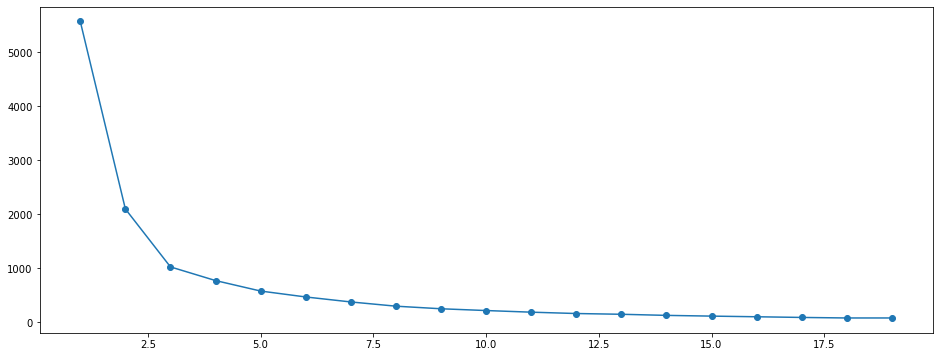

In [45]:
cluster_range = range( 1, 20 )
cluster_errors = []
 
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_scaled )
    cluster_errors.append( clusters.inertia_ )
 
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, 
                             "cluster_errors": cluster_errors } )
 
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

In [46]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 10)
y_kmeans = kmeans.fit_predict(X_scaled)
 
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1
 
# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
clustering_data['cluster'] = cluster

In [47]:
clustering_data.head(10)

,Confirmed,Deaths,cluster
0,14048.0,779.0,1
1,48710.0,891.0,1
2,54777.0,1238.0,1
3,6865.0,31.0,1
4,14824.0,296.0,1
5,65.0,2.0,1
6,1197275.0,34326.0,2
7,115531.0,1942.0,4
8,5.0,0.0,1
9,849.0,2.0,1


In [48]:
kmeans_mean_cluster = pd.DataFrame(round(clustering_data.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Confirmed,Deaths
cluster,,
1,7153.9,131.8
2,1747304.0,45050.0
3,519931.1,11741.9
4,149311.6,3236.5


In [49]:
data['cluster'] = cluster
clusters = data[['Province_State', 'cluster']]
clusters.loc[clusters['cluster'] == 2]

,Province_State,cluster
6,Argentina,2
65,Sao Paulo,2
214,France,2
267,Maharashtra,2
285,Iran,2
487,Poland,2
647,Turkey,2
3956,England,2


In [50]:
data['cluster'] = cluster
clusters = data[['Province_State', 'cluster']]
clusters.loc[clusters['cluster'] == 3]

,Province_State,cluster
53,Minas Gerais,3
56,Parana,3
60,Rio Grande do Sul,3
61,Rio de Janeiro,3
64,Santa Catarina,3
105,Metropolitana,3
151,Capital District,3
186,Czechia,3
194,Ecuador,3
227,Nordrhein-Westfalen,3


In [51]:
data['cluster'] = cluster
clusters = data[['Province_State', 'cluster']]
clusters.loc[clusters['cluster'] == 1]

,Province_State,cluster
0,Afghanistan,1
1,Albania,1
2,Algeria,1
3,Andorra,1
4,Angola,1
...,...,...
3976,Alaska,1
3977,Alaska,1
3979,Kiribati,1
3980,Palau,1


In [52]:
data['cluster'] = cluster
clusters = data[['Province_State', 'cluster']]
clusters.loc[clusters['cluster'] == 4]

,Province_State,cluster
7,Armenia,4
16,Austria,4
17,Azerbaijan,4
20,Bangladesh,4
22,Belarus,4
...,...,...
3950,United Arab Emirates,4
3963,Scotland,4
3966,Wales,4
3970,Venezuela,4


# Question 4

Cluster1- very low risk; Cluster 2- High risk;  Cluster 3- medium risk; cluster 4- low risk

Based on the results generated, I agree with the clustering. Cluster 2 mainly were on lockdown due to the massive spread of the virus eg England, and countries in cluster 3, like Spain, were recovering from the hit from the pandemic. Cluster 4 and 1 were relatively low risk not because they had no cases but because cases of spread and death were relatively low compared to the medium and high-risk clusters

In [53]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude,cluster
0,Afghanistan,Afghanistan,14048.0,779.0,33.93911,67.709953,1
1,Albania,Albania,48710.0,891.0,41.15330,20.168300,1
2,Algeria,Algeria,54777.0,1238.0,28.03390,1.659600,1
3,Andorra,Andorra,6865.0,31.0,42.50630,1.521800,1
4,Angola,Angola,14824.0,296.0,-11.20270,17.873900,1


In [54]:
def get_color(cluster_id):
    if cluster_id == 2:
        return 'darkred'
    if cluster_id == 1:
        return 'green'            
    if cluster_id == 3:
        return 'red'
    if cluster_id == 4:
        return 'yellow'

    
data["color"] = data["cluster"].apply(lambda x: get_color(x))

In [55]:
data.head(10)

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude,cluster,color
0,Afghanistan,Afghanistan,14048.0,779.0,33.93911,67.709953,1,green
1,Albania,Albania,48710.0,891.0,41.15330,20.168300,1,green
2,Algeria,Algeria,54777.0,1238.0,28.03390,1.659600,1,green
3,Andorra,Andorra,6865.0,31.0,42.50630,1.521800,1,green
4,Angola,Angola,14824.0,296.0,-11.20270,17.873900,1,green
5,Antigua and Barbuda,Antigua and Barbuda,65.0,2.0,17.06080,-61.796400,1,green
6,Argentina,Argentina,1197275.0,34326.0,-38.41610,-63.616700,2,darkred
7,Armenia,Armenia,115531.0,1942.0,40.06910,45.038200,4,yellow
8,Australian Capital Territory,Australia,5.0,0.0,-35.47350,149.012400,1,green
9,New South Wales,Australia,849.0,2.0,-33.86880,151.209300,1,green


In [56]:
#create a map
this_map = folium.Map(location =[data["Latitude"].mean(), 
                                 data["Longitude"].mean()], zoom_start=5)
 
def plot_dot(point):    
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.Latitude, point.Longitude],
                        radius=2, 
                        color=point.color,
                        weight=1).add_to(this_map)
    
    
 
 
#clustered_full.apply(,axis=1) #use this to iterate through every row in your dataframe
data.apply(plot_dot, axis = 1)
 
 
#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())
 
#Save the map to an HTML file
this_map.save(os.path.join('covid_map_dataset1.html'))

In [57]:
#displaying saved covid map
from IPython.display import IFrame
IFrame(src='./covid_map_dataset1.html',width =900,height=400)